# **Solución de Ecuaciones No Lineales**

Un sistema de ecuaciones es un conjunto de dos o más ecuaciones que comparten dos o más incógnitas. Las soluciones de un sistema de ecuaciones son todos los valores que son válidos para todas las ecuaciones, o los puntos donde las gráficas de las ecuaciones se intersectan.

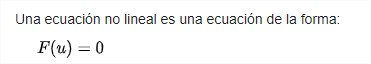

**Descripción del Ejercicio**

**B:** 
Encontrar al menos una de las raices de la función
$$ f(x) =(x-2)^2 -  ln (x)   $$ 
en el intervalo [0,4]

#**Tabla y gráfica**


In [2]:
from math import log, sqrt

x=0
Function=0
print('{:^15}{:^15}'.format('x','F(x)'))
for i in range (10):
  if x != 0:
    Function = (x-2)**2 - log(x)
  x = x + 1
  print('{:^15}{:^15.20f}'.format(x-1,Function))



       x            F(x)      
       0       0.00000000000000000000
       1       1.00000000000000000000
       2       -0.69314718055994528623
       3       -0.09861228866810978211
       4       2.61370563888010920550
       5       7.39056208756589949616
       6       14.20824053077194548678
       7       23.05408985094468832244
       8       33.92055845832016558461
       9       46.80277542266377821534


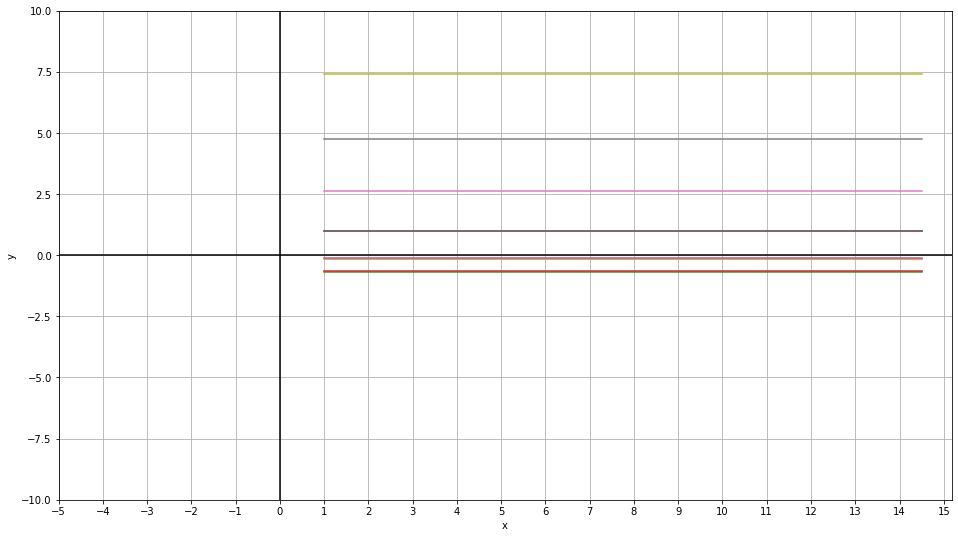

In [3]:
from math import sqrt, pi
from matplotlib import pyplot
from numpy import arange, log
pyplot.figure(figsize=(16,9)) #Tamaño de la imagen

#funcion para evaluar
def F(n):
   return (x-2)**2 - log(x)

x = arange(1,15,0.5) #valores de x donde esta la raiz
pyplot.ylim(-10,10)   #limitacion de valores del eje y

#Grafico de F
pyplot.plot(x, [F(i) for i in x])

#ajustes de los intervalos de los ejes 'x' y 'y'
pyplot.xticks(arange(10, max(x)+1, 1))
pyplot.xticks(arange(-5, 15+1, 1))

#ejes
pyplot.axhline(0, color="black")
pyplot.axvline(0, color="black")
pyplot.ylabel('y')
pyplot.xlabel('x')

pyplot.grid() #muestra la cuadricula

## Metodo de Bisección 

In [26]:
from math import sqrt, pi
from matplotlib import pyplot
from numpy import arange

listBisec = [None]
Ri = 3
Rr = 8/2
Rs = 4
i = 0
Er = 0
Rra=0

#funcion para evaluar
def F(n):
  # if n == 0:
  #   n=1
  return (n-2)**2 - log(n)

#funcion para calcular el error relativo
def error (Rra,Rrn):
  Erel = abs((Rrn - Rra) / Rrn) * 100
  return Erel

print('{:^15}{:^15}{:^15}{:^15}{:^15}{:^15}'.format('# iter','Ri','Rs','Rr','F(Rr)','Erel(%)'))

while (i < 41):
  Er = error(Rra,Rr)
  Rra = Rr   #Rra sera el Rr anterior para determinar el error relativo
  if F(Ri) * F(Rr) < 0:
    Rs = Rr
  elif F(Ri) * F(Rr) > 0:
    Ri = Rr
  elif F(Rr) == 0:
    print('La raiz es ', Rr)
  
  Rr = (Ri + Rs) / 2
  i = i + 1
  #condiciones para el primer error relativo
  if i == 1:
    print('{:^15}{:^15.6f}{:^15.6f}{:^15.6f}{:^15.6f}'.format(i-1,Ri,Rs,Rr,F(Rr)))
  elif i > 1:
    listBisec.append('{:^15.10f}'.format(Er))
    print('{:^15}{:^15.6f}{:^15.6f}{:^15.6f}{:^15.6f}{:^15.10f}'.format(i-1,Ri,Rs,Rr,F(Rr),Er))
#print(listBisec)

    # iter           Ri             Rs             Rr            F(Rr)         Erel(%)    
       0          3.000000       4.000000       3.500000       0.997237    
       1          3.000000       3.500000       3.250000       0.383845     14.2857142857 
       2          3.000000       3.250000       3.125000       0.126191     7.6923076923  
       3          3.000000       3.125000       3.062500       0.009675     4.0000000000  
       4          3.000000       3.062500       3.031250       -0.045499    2.0408163265  
       5          3.031250       3.062500       3.046875       -0.018169    1.0309278351  
       6          3.046875       3.062500       3.054688       -0.004312    0.5128205128  
       7          3.054688       3.062500       3.058594       0.002665     0.2557544757  
       8          3.054688       3.058594       3.056641       -0.000827    0.1277139208  
       9          3.056641       3.058594       3.057617       0.000918     0.0638977636  
      10      

##Regula Falsi

In [27]:
Ri = 3
Rr = 4
i = 0
Er = 0
listFalsi = [None]

#funcion para evaluar
def F(n):
  return (n-2)**2 - log(n)

#funcion para calcular el error relativo
def error (Rra,Rrn):
  Erel = abs((Rrn - Rra) / Rrn) * 100
  return Erel

print('{:^15}{:^15}{:^15}{:^15}{:^15}{:^25}'.format('# iter','Ri','Rs','Rr','F(Rr)','Erel(%)'))

while (i < 26):
  Er = error(Rra,Rr)
  Rra = Rr   #Rra sera el Rr anterior para determinar el error relativo
  if F(Ri) * F(Rr) < 0:
    Rs = Rr
  elif F(Ri) * F(Rr) > 0:
    Ri = Rr
  elif F(Rr) == 0:
    print('La raiz es ', Rr)
  
  Rr = (F(Rs) * Ri - F(Ri) * Rs) / (F(Rs) - F(Ri))
  i = i + 1
  #condiciones para el primer error relativo
  if i == 1:
    print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}'.format(i-1,Ri,Rs,Rr,F(Rr)))
  elif i > 1:
    listFalsi.append('{:^25.10f}'.format(Er))
    print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}{:^15.10f}{:^25.10f}'.format(i-1,Ri,Rs,Rr,F(Rr),Er))
#print(listFalsi)

    # iter           Ri             Rs             Rr            F(Rr)              Erel(%)         
       0        3.0000000000   4.0000000000   3.0363572012   -0.0366222593 
       1        3.0363572012   4.0000000000   3.0496728277   -0.0132212700       31.7368061436      
       2        3.0496728277   4.0000000000   3.0544558052   -0.0047243992       0.4366247553       
       3        3.0544558052   4.0000000000   3.0561618382   -0.0016819989       0.1565901664       
       4        3.0561618382   4.0000000000   3.0567688361   -0.0005980492       0.0558227331       
       5        3.0567688361   4.0000000000   3.0569846101   -0.0002125427       0.0198575002       
       6        3.0569846101   4.0000000000   3.0570612884   -0.0000755238       0.0070583917       
       7        3.0570612884   4.0000000000   3.0570885341   -0.0000268346       0.0025082381       
       8        3.0570885341   4.0000000000   3.0570982148   -0.0000095345       0.0008912300       
       9       

##Método de Newton - Rapshon

In [6]:
from sympy.interactive import printing
from sympy import Derivative, diff, simplify, Symbol, sqrt, pi

printing.init_printing(use_latex="mathjax")

# #calculo de la primera derivada de f
x=Symbol('x')
# Derivative((x-2)**2 - log(x), x, 1).doit()


**Derivada**
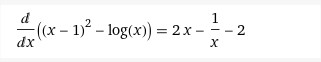

In [24]:
from math import sqrt, pi

Ri = 3
Rr = 4
i = 0
Er = 0
listRapshon = [None]

#funcion para evaluar
def F(n):
  return (n-2)**2 - log(n)

def DF(n):
  DF = ((2 * n) - (1 / n)-2) #Derivada
  return DF
 
#funcion para calcular el error relativo
def error (Rra,Rrn):
  Erel = abs((Rrn - Rra) / Rrn) * 100
  return Erel

print('{:^15}{:^15}{:^20}{:^20}'.format('# iter','Ri','F(Ri)','Erel(%)'))

while (i < 53):
  Er = error(Rra,Rr)
  Rra = Rr   #Rra sera el Rr anterior para determinar el error relativo
  Rr = Ri - (F(Ri) / (DF(Ri)))
  if i == 0:
    print('{:^15}{:^15.10f}{:^20.15f}'.format(i,Ri,Rr))
  elif i > 1:
    listRapshon.append('{:^25.15f}'.format(Er))
    print('{:^15}{:^15.10f}{:^20.15f}{:^25.15f}'.format(i-1,Ri,F(Rr),Er))
  Ri = Rr
  i = i + 1

print(listRapshon)

    # iter           Ri              F(Ri)              Erel(%)       
       0        3.0000000000   3.026894260545848  
       1        3.0411352861   -0.015002756395721     0.468279908603725    
       2        3.0486665550   -0.007943762277458     0.247034851542272    
       3        3.0526467830   -0.004200938875105     0.130386129896157    
       4        3.0547495819   -0.002220161465355     0.068837030172646    
       5        3.0558603125   -0.001172935282495     0.036347559279629    
       6        3.0564469614   -0.000619562403510     0.019193820130328    
       7        3.0567567932   -0.000327231141405     0.010135964009190    
       8        3.0569204229   -0.000172823310749     0.005352761987686    
       9        3.0570068385   -0.000091272187887     0.002826803914603    
      10        3.0570524757   -0.000048202382076     0.001492849448929    
      11        3.0570765772   -0.000025456302242     0.000788383817329    
      12        3.0570893054   -0.00001344

##Método de Secante

In [21]:
 from math import sqrt, pi

 #Funcion para evaluar Fx
def F(n):
  return (n-2)**2 - log(n)

#funcion para calcular el error relativo
def error (Rra,Rrn):
  Erel = abs((Rrn - Rra) / Rrn) * 100
  return Erel

Ri_1 = 3
Ri = 4
Rr = 3
i = 0
Er = 0
Rra=0
listSecante = [None]

print('{:^15}{:^15}{:^15}{:^15}{:^20}'.format('# iter','Ri-1','Ri','F(Ri)','Erel(%)'))

while (i < 8):
  Er = error(Rra,Rr)
  Rra = Rr   #Rra sera el Rr anterior para determinar el error relativo
  Rr = Ri - ((F(Ri) * (Ri_1 - Ri)) / ((F(Ri_1)) - (F(Ri))))
  i = i + 1
  if i == 1:
    print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}'.format(i-1,Ri_1, Ri,Rr))
  elif i > 1:
    listSecante.append('{:^20.15f}'.format(Er))
    print('{:^15}{:^15.10f}{:^15.10f}{:^15.10f}{:^20.15f}'.format(i-1,Ri_1,Ri,F(Rr),Er))
  Ri_1 = Ri
  Ri = Rr
print(listSecante)

    # iter          Ri-1            Ri            F(Ri)           Erel(%)       
       0        3.0000000000   4.0000000000   3.0363572012  
       1        4.0000000000   3.0363572012   -0.0132212700  1.197395392304729  
       2        3.0363572012   3.0496728277   0.0001652126   0.436624755275379  
       3        3.0496728277   3.0571959923   -0.0000007269  0.246080544323596  
       4        3.0571959923   3.0571031433   -0.0000000000  0.003037156786640  
       5        3.0571031433   3.0571035500   -0.0000000000  0.000013303676110  
       6        3.0571035500   3.0571035500   0.0000000000   0.000000000724973  
       7        3.0571035500   3.0571035500   0.0000000000   0.000000000000015  
[None, ' 1.197395392304729  ', ' 0.436624755275379  ', ' 0.246080544323596  ', ' 0.003037156786640  ', ' 0.000013303676110  ', ' 0.000000000724973  ', ' 0.000000000000015  ']


##Grafica Numero de Iteraciones vs Erel(%)

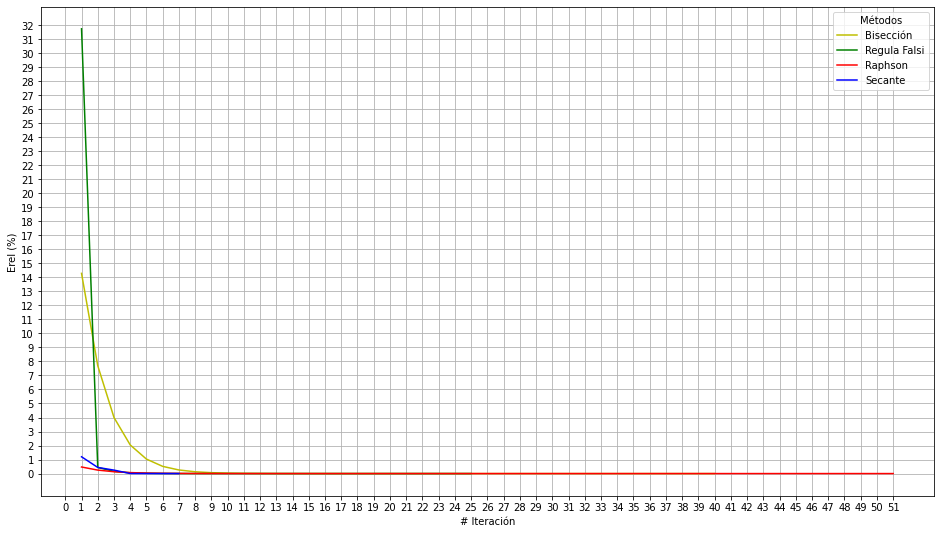

In [34]:
from matplotlib import pyplot
from numpy import arange

pyplot.figure(figsize=(16,9)) # Tamaño de la imagen

pyplot.plot(listBisec,color='Y',label='Bisección')
pyplot.plot(listFalsi,color='g',label='Regula Falsi')
pyplot.plot(listRapshon,color='r',label='Raphson')
pyplot.plot(listSecante,color='b',label='Secante')

pyplot.xlabel('# Iteración')
pyplot.ylabel('Erel (%)')

pyplot.legend(loc="upper right", title="Métodos")

#ajuste de intervalos de ejes 'x' y 'y'
pyplot.xticks(arange(0,51+1,1))
pyplot.yticks(arange(0,32+1,1))

pyplot.grid()#Mostrar grafica
pyplot.show()
